# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [25]:
# Imports for all problems
import numpy as np
from sympy import minimal_polynomial, factor
from sympy import Matrix, latex, Rational, symbols, simplify, expand, cos, sin, pi, sqrt, acos, Eq, solve, gcd
from sympy.polys.domains import GF
from IPython.display import display, Math
import random

# variable symbols
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')

def mprint(matrix):
    display(Math(latex(matrix)))

def eprint(eigen):
  """pretty print sympy .eigenvects() output"""
  for eval, mult, evec in eigen:
    print(f"eigenvalue = {eval}, multiplicity: {mult}")
    mprint(evec[0].T)

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def mod_replace(self, x, y, z):
    result = row_replace(self, x, y, z)
    result2 = result.row_mod29(x)
    return result2

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def mod_scale(self, x, y):
    result = row_scale(self, x, y)
    result2 = result.row_mod29(x)
    return result2

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

def row_mod29(self, x):
    """
    perform mod 29 on row x
    """
    result = self.copy()
    result[(x-1), :] = result[(x-1), :] % 29
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch
Matrix.row_mod29 = row_mod29
Matrix.mod_replace = mod_replace
Matrix.mod_scale = mod_scale

# Test Matrices

In [2]:
# some useful matrices for testing
# Create symbols for the first 16 lowercase letters
letters = symbols('a b c d e f g h i j k l m n o p')

# Create a 4x4 matrix using the symbols
Avar = Matrix(4, 4, letters)
mprint(Avar)

# matrix with random numbers
random.seed(42)
Arand = Matrix([[random.randint(0, 9) for _ in range(4)] for _ in range(4)])
mprint(Arand)

# Matrix with rows identified
Arows = Matrix(np.matrix('1 1 1 1;2 2 2 2;3 3 3 3;4 4 4 4'))
mprint(Arows)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 1

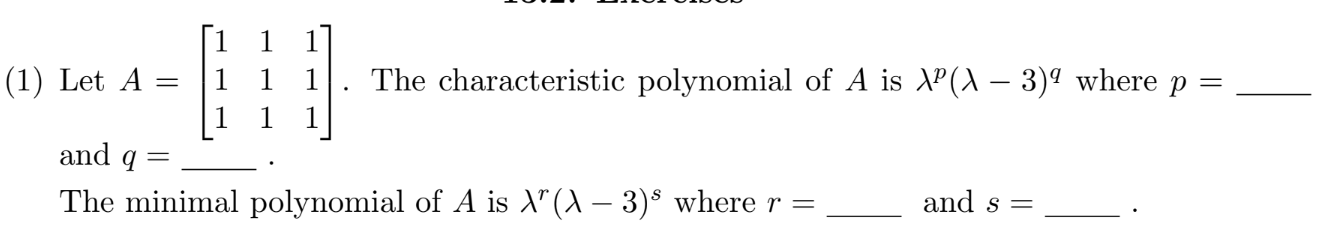

In [10]:
A = Matrix.ones(3)
A

Matrix([
[1, 1, 1],
[1, 1, 1],
[1, 1, 1]])

In [11]:
A.charpoly()

PurePoly(lambda**3 - 3*lambda**2, lambda, domain='ZZ')

In [ ]:
# minimal polynomial m(A) has the same expressions, e.g. a and (a-3) in this case,
# but the same or lower exponents, but at least 1 (never 0), that make m(A) = 0
# I'm just going to check the minimal ones and work my way up until I find the answer
I = Matrix.eye(3)
A*(A-3*I) # r = 1, s = 1, m(A) = 0

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [ ]:
ansprint("p = 2, q = 1, r = 1, s = 1")

***********************************--ANSWER--***********************************

p = 2, q = 1, r = 1, s = 1

***********************************--ANSWER--***********************************


In [ ]:
A.eigenvals()

{3: 1, 0: 2}

# Exercise 2

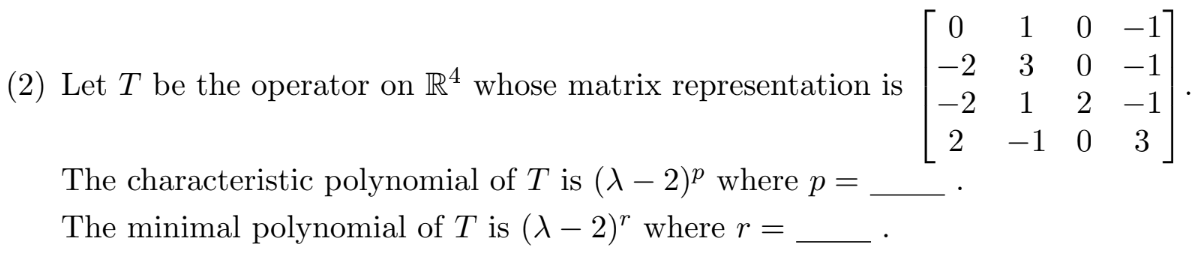

In [ ]:
T = Matrix(np.matrix('0 1 0 -1;-2 3 0 -1;-2 1 2 -1;2 -1 0 3'))
T

Matrix([
[ 0,  1, 0, -1],
[-2,  3, 0, -1],
[-2,  1, 2, -1],
[ 2, -1, 0,  3]])

In [ ]:
T.charpoly()

PurePoly(lambda**4 - 8*lambda**3 + 24*lambda**2 - 32*lambda + 16, lambda, domain='ZZ')

In [ ]:
expand((a-2)**4)

a**4 - 8*a**3 + 24*a**2 - 32*a + 16

In [ ]:
# test values of r
I = Matrix.eye(4)
for r in range(1,5):
    print(f"r = {r}, m(A) = {(T-2*I)**r}")

r = 1, m(A) = Matrix([[-2, 1, 0, -1], [-2, 1, 0, -1], [-2, 1, 0, -1], [2, -1, 0, 1]])
r = 2, m(A) = Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
r = 3, m(A) = Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
r = 4, m(A) = Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])


In [ ]:
ansprint("p = 4, r = 2")

***********************************--ANSWER--***********************************

p = 4, r = 2

***********************************--ANSWER--***********************************


# Exercise 3

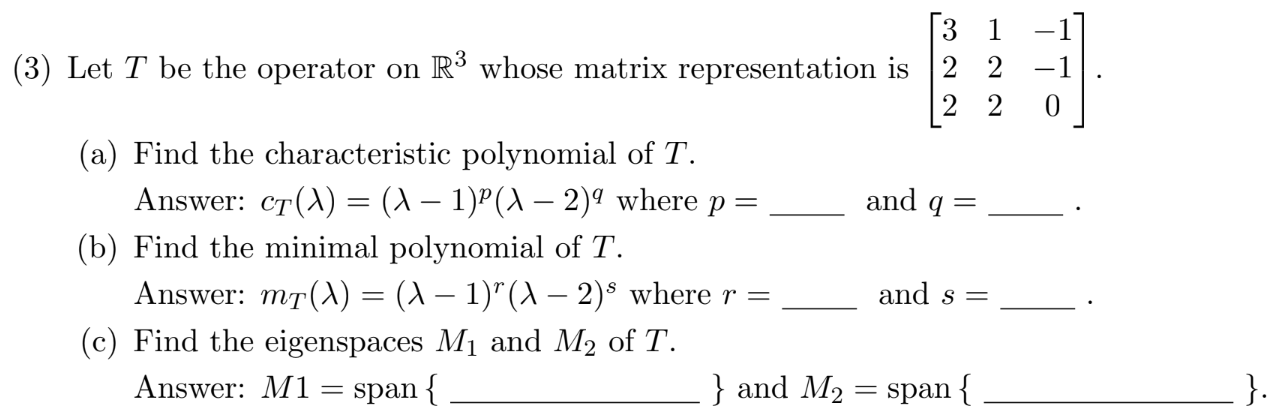

In [ ]:
T = Matrix(np.matrix('3 1 -1;2 2 -1;2 2 0'))
T

Matrix([
[3, 1, -1],
[2, 2, -1],
[2, 2,  0]])

In [ ]:
factor(T.charpoly(a).as_expr())

(a - 2)**2*(a - 1)

In [ ]:
# test minimal poly with 1 and 1
I = Matrix.eye(3)
(T - 2*I)*(T - I)

Matrix([
[2, 0, -1],
[2, 0, -1],
[4, 0, -2]])

In [ ]:
# That didn't work, let's test the char poly
(T - 2*I)**2 * (T - I)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [ ]:
eprint(T.eigenvects())

eigenvalue = 1, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 2, multiplicity: 2


<IPython.core.display.Math object>

In [ ]:
ansprint("p=1, q=2, r=1, s=2, M1 = span{(0.5, 0, 1)}, M2 = span{(0.5, 0.5, 1)}")

***********************************--ANSWER--***********************************

p=1, q=2, r=1, s=2, M1 = span{0.5, 0, 1}, M2 = span{0.5, 0.5, 1}

***********************************--ANSWER--***********************************


In [ ]:
# Answer in Erdman was spans (1,0,2) and (1,1,2)
# These are the same spans because they are just 2x bigger than mine

# Exercise 4

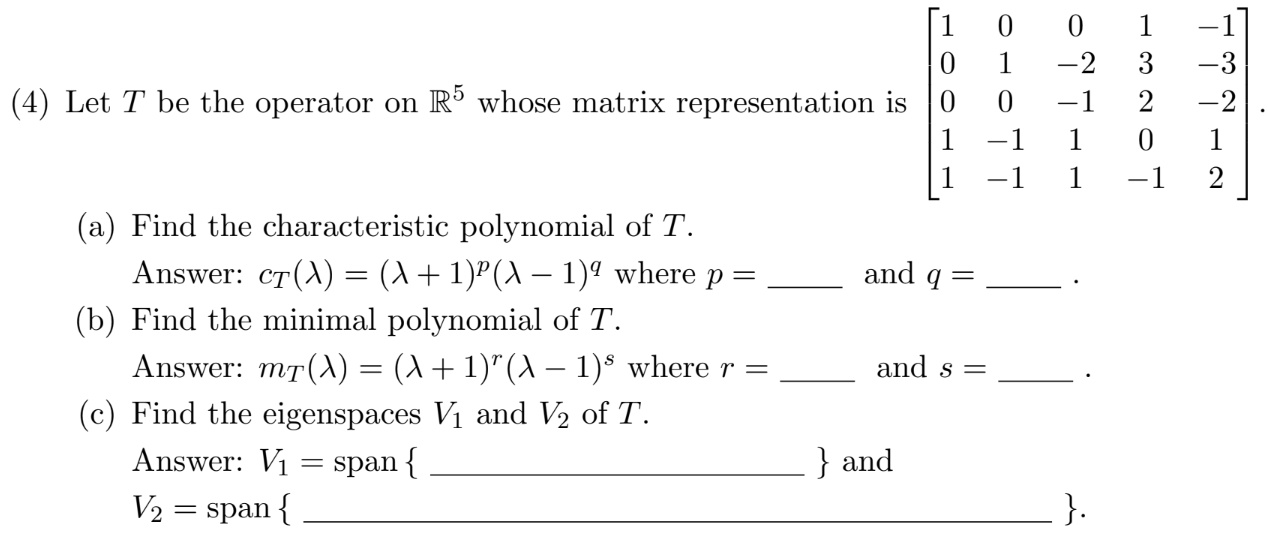

In [3]:
T = Matrix(np.matrix('1 0 0 1 -1;0 1 -2 3 -3;0 0 -1 2 -2;1 -1 1 0 1;1 -1 1 -1 2'))
T

Matrix([
[1,  0,  0,  1, -1],
[0,  1, -2,  3, -3],
[0,  0, -1,  2, -2],
[1, -1,  1,  0,  1],
[1, -1,  1, -1,  2]])

In [4]:
factor(T.charpoly().as_expr()) # p = 1, q = 4

(lambda - 1)**4*(lambda + 1)

In [5]:
I = Matrix.eye(5)
for s in range(1,5):
    print(f"s = {s}, m(T) = {(T+I)*(T-I)**s}") # r = 1, s = 2

s = 1, m(T) = Matrix([[0, 0, 0, 2, -2], [0, 0, 0, 2, -2], [0, 0, 0, 0, 0], [2, -2, 2, -2, 2], [2, -2, 2, -2, 2]])
s = 2, m(T) = Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
s = 3, m(T) = Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
s = 4, m(T) = Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])


In [6]:
eprint(T.eigenvects())

eigenvalue = -1, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 1, multiplicity: 4


<IPython.core.display.Math object>

In [13]:
# If I understand things correctly, J is for Jordan and has three blocks:
# 1x1 block of -1 (first eigenvalue, eigenvector is 1st column of P)
# 2x2 block with '1 1;0 1' (second eigenvalue of 1, eigenspace is 2nd column of P)
# 2x2 block with '1 1;0 1' (third eigenvalue of 1, eigenspace is 4th column of P)
# vectors of eigenspace are the first column in the jordan block
P, J = T.jordan_form()
display(Math(r'\quad'.join([latex(P), latex(J)])))
# so V2 has span of (1, 1, 0, 0, 0) and (0, 0, 0, 1, 1)

<IPython.core.display.Math object>

In [14]:
ansprint("p = 1, q = 4, r = 1, s = 2, V1 spans (0 1 1 0 0), V2 spans (1 1 0 0 0) and (0 0 0 1 1)")
# Grok4 got these answers too, but Grok3 did not...

***********************************--ANSWER--***********************************

p = 1, q = 4, r = 1, s = 2, V1 spans (0 1 1 0 0), V2 spans (1 1 0 0 0) and (0 0 0 1 1)

***********************************--ANSWER--***********************************


# Exercise 5

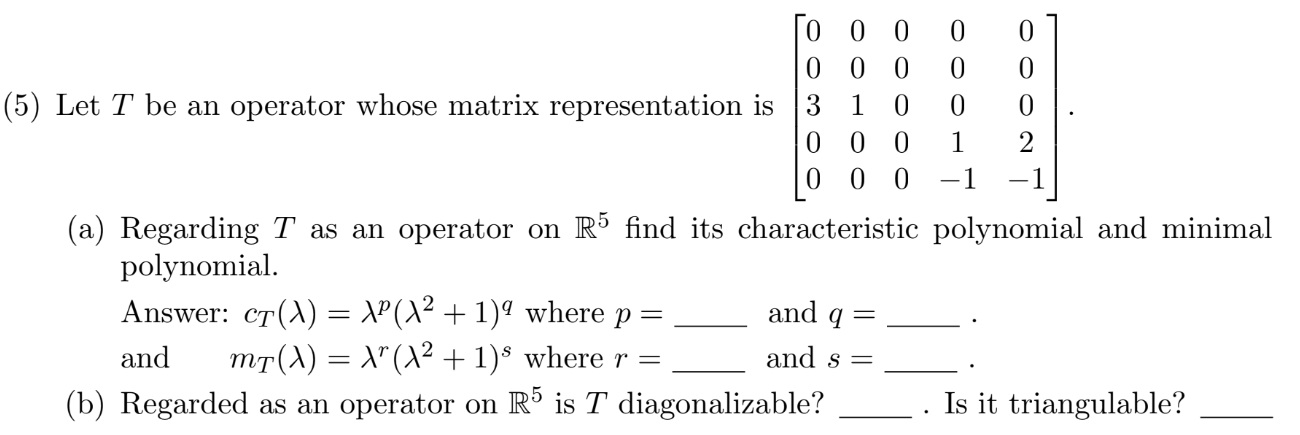

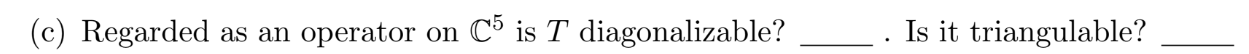

In [15]:
T = Matrix(np.matrix('0 0 0 0 0;0 0 0 0 0;3 1 0 0 0;0 0 0 1 2;0 0 0 -1 -1'))
T

Matrix([
[0, 0, 0,  0,  0],
[0, 0, 0,  0,  0],
[3, 1, 0,  0,  0],
[0, 0, 0,  1,  2],
[0, 0, 0, -1, -1]])

In [17]:
factor(T.charpoly().as_expr()) # p = 3, q = 1

lambda**3*(lambda**2 + 1)

In [18]:
I = Matrix.eye(5)
for r in range(1,4):
    print(f"r = {r}, {T**r * (T*T + I)}") # r = 2, s = 1

r = 1, Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [3, 1, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
r = 2, Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
r = 3, Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])


In [20]:
T.is_diagonalizable() # diagonizable in R is no

False

In [21]:
P, J = T.jordan_form()
display(Math(r'\quad'.join([latex(P), latex(J)])))

<IPython.core.display.Math object>

In [26]:
T.upper_triangular() # triangulable in R is yes

Matrix([
[0, 0, 0, 0,  0],
[0, 0, 0, 0,  0],
[0, 0, 0, 0,  0],
[0, 0, 0, 1,  2],
[0, 0, 0, 0, -1]])

In [27]:
# diagonalizable means there's a P where P.inv() * T * P = D where D is a diagonal matrix
# (P contains the eigenvectors and D contains the eigenvalues)
# let's try this with the P from T.jordan_form()
P.inv() * T * P # it does not give a diagonal matrix

Matrix([
[0, 1, 0,  0, 0],
[0, 0, 0,  0, 0],
[0, 0, 0,  0, 0],
[0, 0, 0, -I, 0],
[0, 0, 0,  0, I]])

In [28]:
T.eigenvals()

{0: 3, -I: 1, I: 1}

In [29]:
eprint(T.eigenvects())

eigenvalue = 0, multiplicity: 3


<IPython.core.display.Math object>

eigenvalue = -I, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = I, multiplicity: 1


<IPython.core.display.Math object>

In [30]:
# I think T is still not diagonizable in C5 because D isn't a diagonal matrix
#   and it doesn't have five unique eigenvalues (same with T.eigenvals() result)
ansprint("""
(a) p = 3, q = 1, r = 2, s = 1
(b) in R5, diagonalizable: no, triangulable: yes
(c) in C5, diagonalizable: no, triangulable: yes
""")

***********************************--ANSWER--***********************************


(a) p = 3, q = 1, r = 2, s = 1
(b) in R5, diagonalizable: no, triangulable: yes
(c) in C5, diagonalizable: no, triangulable: yes


***********************************--ANSWER--***********************************


In [31]:
# my answer is the same as in the book EXCEPT: in R5, triangulable: NO
# I learned that every square matrix is triangulable over C because its JCF is upper triangular.
# JCF = Jordan canonical form (J above)
# For triangulable over R, look at the minimal polynomial:
#  - if each factor occurs only once, it is triangulable
#  - if one of the factors has an exponent >1, it is not triangulable
# for this problem, r = 2 so it is not triangulable

Matrix([
[0, 0, 0,  0,  0],
[0, 0, 0,  0,  0],
[3, 1, 0,  0,  0],
[0, 0, 0,  1,  2],
[0, 0, 0, -1, -1]])

In [38]:
# I think T is still not diagonizable in C5 because D isn't a diagonal matrix
#   and it doesn't have five unique eigenvalues (same with T.eigenvals() result)
ansprint("""CORRECTED ANSWER
(a) p = 3, q = 1, r = 2, s = 1
(b) in R5, diagonalizable: no, triangulable: NO
(c) in C5, diagonalizable: no, triangulable: yes
""")

***********************************--ANSWER--***********************************

CORRECTED ANSWER
(a) p = 3, q = 1, r = 2, s = 1
(b) in R5, diagonalizable: no, triangulable: NO
(c) in C5, diagonalizable: no, triangulable: yes


***********************************--ANSWER--***********************************


# Exercise 6

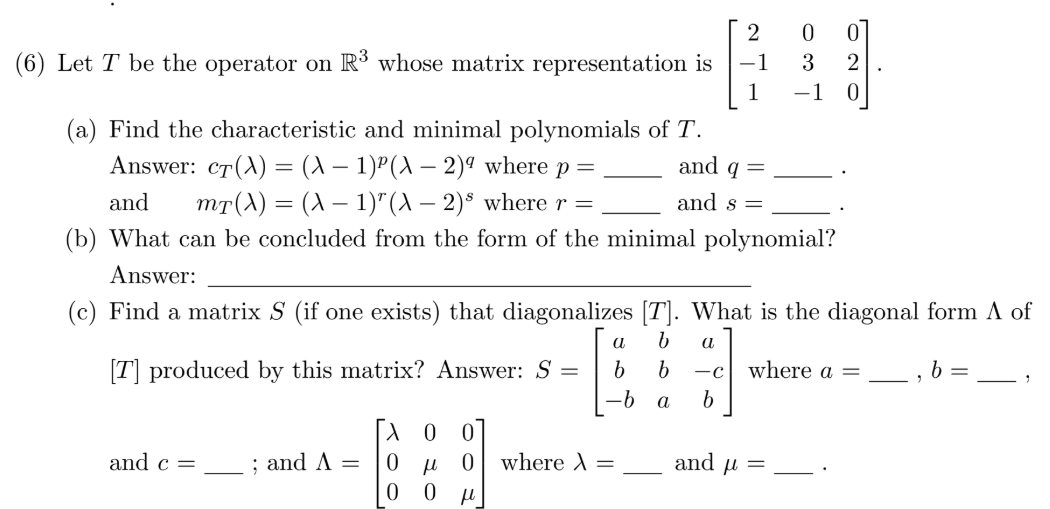

In [66]:
T = Matrix(np.matrix('2 0 0;-1 3 2;1 -1 0'))
T

Matrix([
[ 2,  0, 0],
[-1,  3, 2],
[ 1, -1, 0]])

In [41]:
factor(T.charpoly().as_expr()) # p = 1, q = 2

(lambda - 2)**2*(lambda - 1)

In [48]:
# find min poly
# only need to check one equation with r = s = 1
# since the exponents are one, we can conclude that I is triangulable
I = Matrix.eye(3)
(T-I)*(T-2*I) # equals zero matrix, so r = 1, s = 1

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [49]:
# OK, diagonalizable and triangulable from the minimal polynomial:
# First check triangulable
#   Q: Are there any irreducible quadratic factors, e.g. (x^2 + 1)?
#      YES: it is NOT triangulable (If it's not triangulable, it is also NOT diagonizable)
#      NO: it IS triangulable, then:
#          Q: Are any of the factors repeated (exponents >1)?
#             YES: it is NOT diagonalizable
#             NO: it IS diagonalizable
# The above is all for the REAL space
# In the complex space, quadratic factors are reduceable
#    and all square matrices are triangulable in the Complex plane
ansprint("""
(a) p = 1, q = 2, r = 1, s = 1
(b) T is triangulable (no quadradics) and diagonalizable (minpoly exp's all 1)
""")

***********************************--ANSWER--***********************************


(a) p = 1, q = 2, r = 1, s = 1
(b) T is triangulable (no quadradics) and diagonalizable (minpoly exp's all 1)


***********************************--ANSWER--***********************************


In [50]:
P, J = T.jordan_form()
display(Math(r'\quad'.join([latex(P), latex(J)])))

<IPython.core.display.Math object>

In [63]:
# to get S in the appropriate form, I called the columns of P v1, v2, v3
# then I did operations on P to get P2 that would maintain the properties of P
# (since v2 and v3 are eigenvectors for the same eigenvalue (2), we can replace
#    them with linear combinations of v2 and v3)
# - multiply v1 by -1
# - keep v2 the same (linear combination v2 = 1*v2 + 0*v3)
# - v3 = -2*v2 + 1*v3
# this gives P2
P2 = Matrix(np.matrix('0 1 0;1 1 -2;-1 0 1'))
P2

Matrix([
[ 0, 1,  0],
[ 1, 1, -2],
[-1, 0,  1]])

In [64]:
# make sure P2 still gives D (the eigenvalue diagonal matrix)
P2.inv() * T * P2 # it does!

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 2]])

In [65]:
ansprint("(c) a = 0, b = 1, c = 2, lambda = 1, mu = 2")

***********************************--ANSWER--***********************************

(c) a = 0, b = 1, c = 2, lambda = 1, mu = 2

***********************************--ANSWER--***********************************


In [67]:
# Grok4 got it right, Grok3 did not.

# Exercise 7

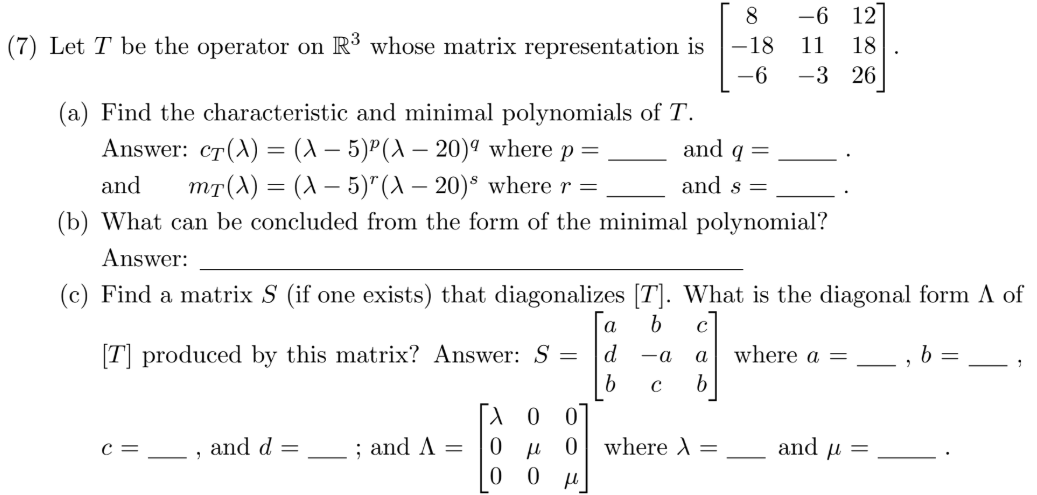

In [74]:
S = Matrix([[a,b,c],[d,-a,a],[b,c,b]])
T = Matrix(np.matrix('8 -6 12;-18 11 18;-6 -3 26'))
T

Matrix([
[  8, -6, 12],
[-18, 11, 18],
[ -6, -3, 26]])

In [70]:
factor(T.charpoly().as_expr()) # p = 1, q = 2

(lambda - 20)**2*(lambda - 5)

In [71]:
# check s = 1
I = Matrix.eye(3)
(T-5*I)*(T-20*I) # equal to zero so r = 1, s = 1

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [72]:
ansprint("""
(a) p = 1, q = 2, r = 1, s = 1
(b) T is diagonalizable
""")

***********************************--ANSWER--***********************************


(a) p = 1, q = 2, r = 1, s = 1
(b) T is diagonalizable


***********************************--ANSWER--***********************************


In [75]:
P, J = T.jordan_form()
display(Math(r'\quad'.join([latex(S), latex(P), latex(J)])))

<IPython.core.display.Math object>

In [76]:
# modified P as follows (columns are v1, v2, v3)
# v2 = v2 * -2
# v3 = v3 - v2
P2 = Matrix(np.matrix('2 1 0;3 -2 2;1 0 1'))
P2

Matrix([
[2,  1, 0],
[3, -2, 2],
[1,  0, 1]])

In [77]:
P2.inv() * T * P2

Matrix([
[5,  0,  0],
[0, 20,  0],
[0,  0, 20]])

In [78]:
ansprint("(c) a = 2, b = 1, c = 0, d = 3, lambda = 5, mu = 20")

***********************************--ANSWER--***********************************

(c) a = 2, b = 1, c = 0, d = 3, lambda = 5, mu = 20

***********************************--ANSWER--***********************************


# Exercise 8

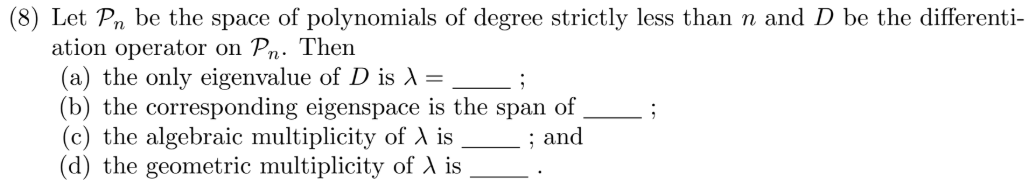

In [80]:
# let's do this for Pn where n = 5
# the polynomials will then be of the form a*x^4 + b*x^3 + c*x^2 + d*x + e
# the polynomial would be the matrix [a, b, c, d, e]
# the derivative is 0*x^4 + 4a*x^3 + 3b*x^2 + 2c*x + d
# A matrix
A = Matrix([a, b, c, d, e]).T
A

Matrix([[a, b, c, d, e]])

In [90]:
D = Matrix([[0, 4, 0, 0, 0],
            [0, 0, 3, 0, 0],
            [0, 0, 0, 2, 0],
            [0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0]])
D

Matrix([
[0, 4, 0, 0, 0],
[0, 0, 3, 0, 0],
[0, 0, 0, 2, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]])

In [91]:
A * D

Matrix([[0, 4*a, 3*b, 2*c, d]])

In [92]:
D.eigenvals() # the only eigenvalue of D is lambda = 0, algebraic multiplicity is 5

{0: 5}

In [94]:
P, J = D.jordan_form()
display(Math(r'\quad'.join([latex(P), latex(J)])))
# the eigenvectors are essentially unit vectors in all five dimensions
# the eigenspace is any linear combination of these which is the entire space Pn

<IPython.core.display.Math object>

In [104]:
P.inv() * D * P

Matrix([
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]])

In [95]:
D.is_diagonalizable()

False

In [96]:
D.charpoly()

PurePoly(lambda**5, lambda, domain='ZZ')

In [97]:
for exp in range(1,6):
    print(f"exp = {exp}, {D**exp}") # min poly is lambda^5
# that means the largest Jordan block is 5x5
# geometric multiplicity is the number of Jordan blocks, so 1 in this case

exp = 1, Matrix([[0, 4, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 2, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0]])
exp = 2, Matrix([[0, 0, 12, 0, 0], [0, 0, 0, 6, 0], [0, 0, 0, 0, 2], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
exp = 3, Matrix([[0, 0, 0, 24, 0], [0, 0, 0, 0, 6], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
exp = 4, Matrix([[0, 0, 0, 0, 24], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])
exp = 5, Matrix([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]])


In [99]:
ansprint("""
(a) the only eigenvalue for D is 0
(b) the corresponding eigenspace is Pn
(c) the algebraic multiplicity is n (5 in my test example)
(d) the geometric multiplicity is 1
""")

***********************************--ANSWER--***********************************


(a) the only eigenvalue for D is 0
(b) the corresponding eigenspace is Pn
(c) the algebraic multiplicity is n (5 in my test example)
(d) the geometric multiplicity is 1


***********************************--ANSWER--***********************************


In [105]:
# Both Groks (3 and 4) say that the eigenspace is (1), i.e. any scalar with no x
# for rows with the same eigenvector, you just take the first vector as the
# vector that spans the space. But which is first? They're all equivalent
# the vector (1 0 0 0 0) would span the space (x^4)
# the vector (0 0 0 0 1) would span the space (1)
# why is the correct answer (1)?
eprint(D.eigenvects())

eigenvalue = 0, multiplicity: 5


<IPython.core.display.Math object>

In [117]:
# the eigenspace needs to be correct for lambda = 0
# so D*A = 0*A
# lets try both (1 0 0 0 0) and (0 0 0 0 1) for A
print(D * Matrix([1, 0, 0, 0, 0]))
print(D * Matrix([0, 1, 0, 0, 0]))
print(D * Matrix([0, 0, 1, 0, 0]))
print(D * Matrix([0, 0, 0, 1, 0]))
print(D * Matrix([0, 0, 0, 0, 1]))
print(D * Matrix([5, 0, 0, 0, 0]))
# the x^4 column is alway zero when D is applied, so that's the eigenspace?
# whatever is in the x^4 column is removed when D*A is calculated
ansprint("(b) the corresponding eigenspace is (1)")

Matrix([[0], [0], [0], [0], [0]])
Matrix([[4], [0], [0], [0], [0]])
Matrix([[0], [3], [0], [0], [0]])
Matrix([[0], [0], [2], [0], [0]])
Matrix([[0], [0], [0], [1], [0]])
Matrix([[0], [0], [0], [0], [0]])
***********************************--ANSWER--***********************************

(b) the corresponding eigenspace is (1)

***********************************--ANSWER--***********************************
